# Problem Statement

Malls and shopping complexes often compete with each other to increase their customer base and hence make huge profits. To achieve this task machine learning is being applied in many stores already.It is amazing to realize the fact that how machine learning can aid in such ambitions. AI and ML already have been intimately involved in online shopping since, well, the beginning of online shopping. You can’t use Amazon or any other shopping service without getting recommendations, which are often personalized based on the vendor’s understanding of your traits: your purchase history, your browsing history, and possibly much more. The shopping complexes make use of their customer's data and develop ML models to target the right customers.This not only increases sales but also makes their business efficient.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the dataset
mall = pd.read_csv(r'Mall_Customers.csv')
mall

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
#first 5 records
mall.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
#last 5 records
mall.tail(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [5]:
mall.shape

(200, 5)

In [6]:
mall.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [7]:
mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
mall.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### observations

* Age varies from 18 to 70 meaning that the mall is always accessed by different generations
* The average age is 39
* Annual Income(k$) varies from 15 to 137
* while the avearge annual income is 60
* 1 is the least spending score while 100 is the greatest spending score
* The average spending score is 50

In [9]:
mall.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

There are no missing values.

# Explolatory Data Analysis

### Univariate Analysis

This refers to the analysis of only one variable.

<Axes: xlabel='Annual Income (k$)', ylabel='Count'>

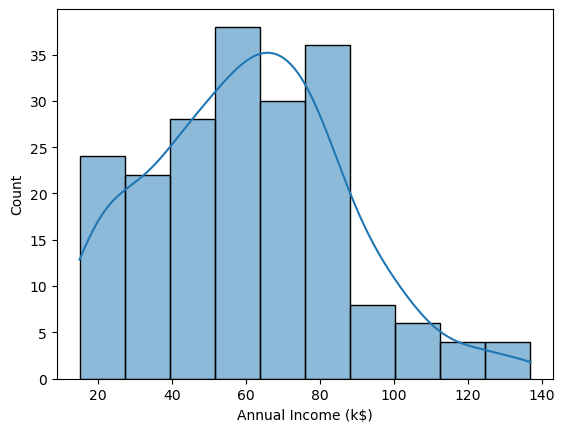

In [13]:
#distribution of Annual Income (k$)
sns.histplot(data=mall, x = 'Annual Income (k$)', kde = True) 

The Annual Income (k$) distribution is skewed to the right.

<Axes: xlabel='Age', ylabel='Count'>

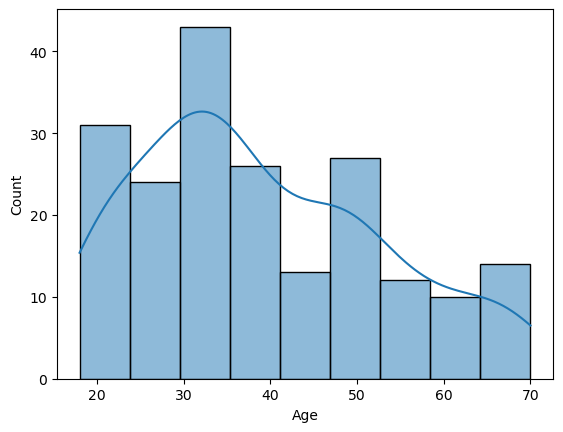

In [14]:
# Age distribution
sns.histplot(data = mall, x = 'Age', kde = True)

The age distribution is also skewed to the right

<Axes: xlabel='Spending Score (1-100)', ylabel='Count'>

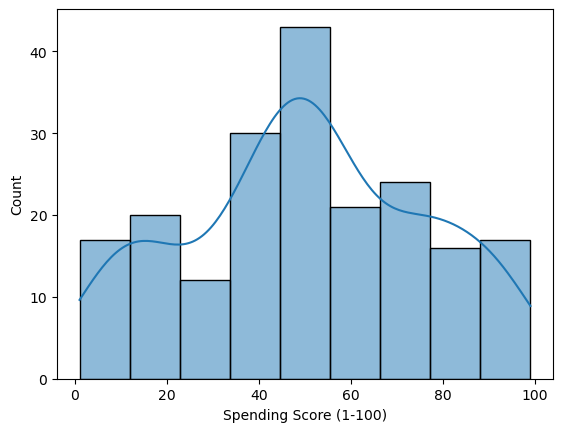

In [15]:
# speding score distribution
sns.histplot(data = mall, x ='Spending Score (1-100)', kde = True)

The distribution of the spending score is almost a normal distribution.

In [16]:
#gender
#Ill rename the column first
mall.rename(columns={'Genre':'Gender'}, inplace=True)
mall.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<Axes: xlabel='Gender'>

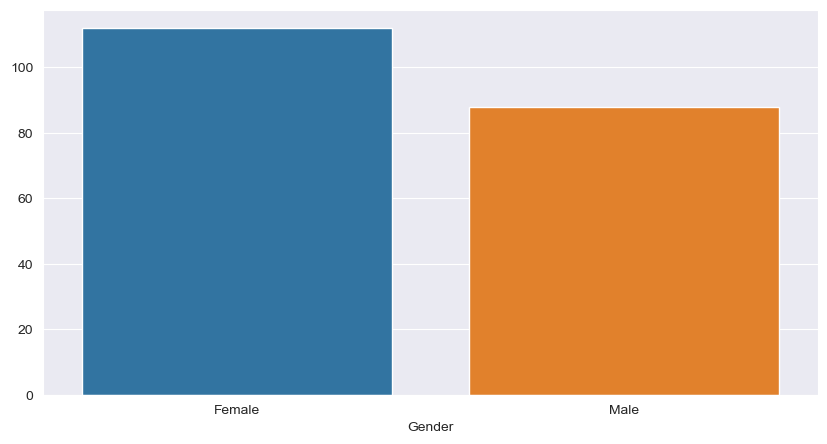

In [25]:
#check for the distribution of male and female genders
genders = mall['Gender'].value_counts()
sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
sns.barplot(data=mall, x=genders.index, y=genders.values)

### bivariate Analysis

Used to check the relationship between two variables.

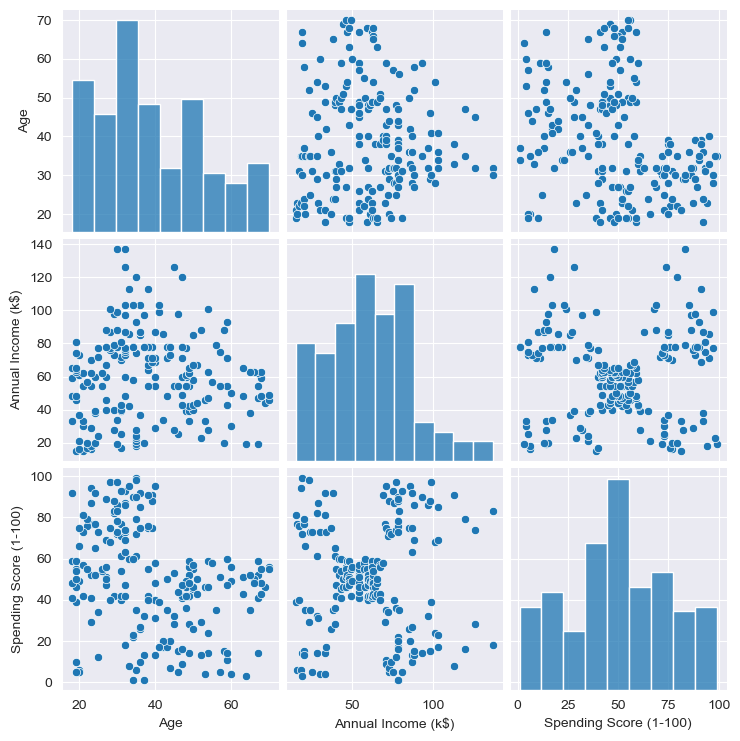

In [26]:
sns.pairplot(mall[['Age', 'Gender', 'Annual Income (k$)', 'Spending Score (1-100)']])

### observations

* Most of the customers are aged between 20-40
* The spending score is high for customers aged 20-40
* The spending score is equally high for customers with very low income and those with high income.

<Axes: >

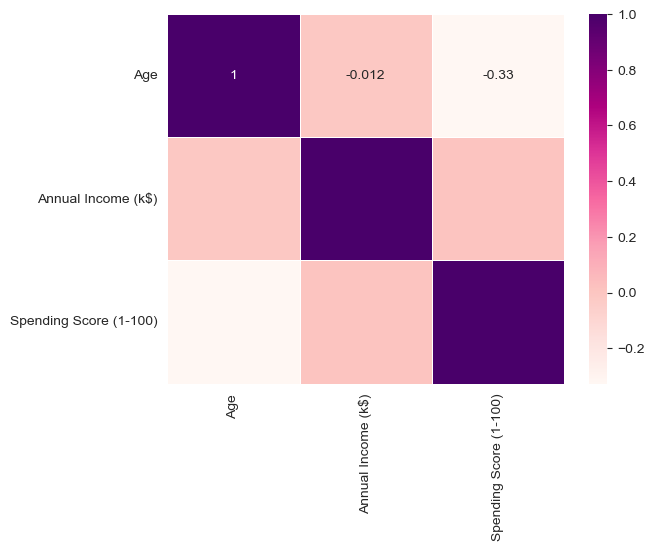

In [30]:
#heatmap
sns.heatmap(mall[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr(), cmap = 'RdPu', annot = True, linewidths=.5)

The heatmap shows that there is multicollinearity among the variables

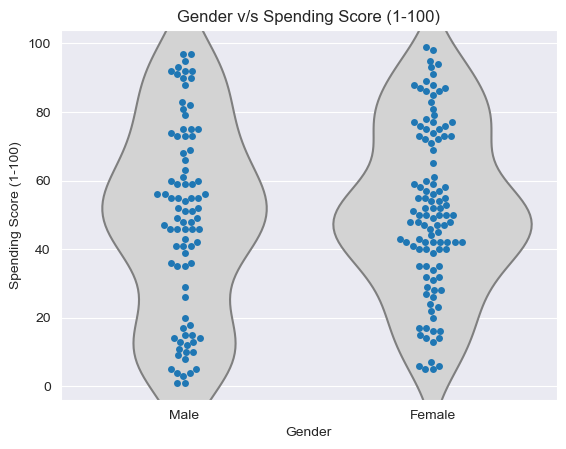

In [38]:
# Gender vs spending score
sns.violinplot(data=mall, x = 'Gender', y='Spending Score (1-100)', inner = None, color = 'lightgrey')
sns.swarmplot(data=mall, x='Gender', y='Spending Score (1-100)')
plt.title('Gender v/s Spending Score (1-100)')
plt.show()

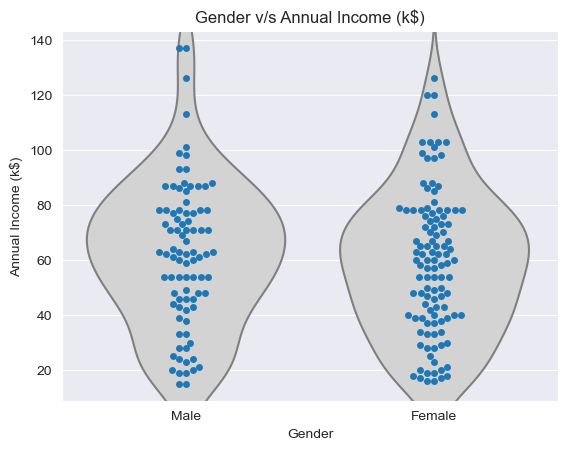

In [39]:
#Gender vs Annual Income
sns.violinplot(data=mall, x = 'Gender', y='Annual Income (k$)', inner = None, color = 'lightgrey')
sns.swarmplot(data=mall, x='Gender', y='Annual Income (k$)')
plt.title('Gender v/s Annual Income (k$)')
plt.show()

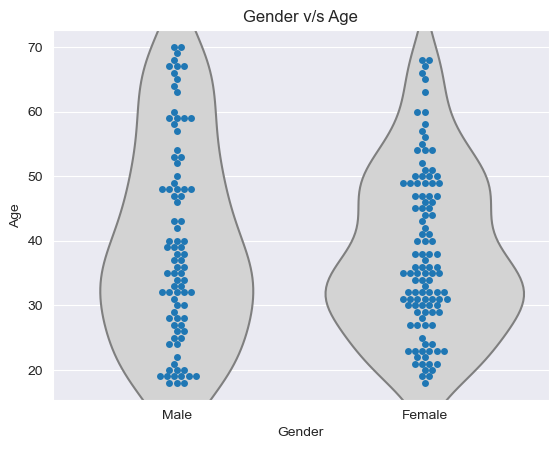

In [40]:
#gender vs Age
sns.violinplot(data=mall, x = 'Gender', y='Age', inner = None, color = 'lightgrey')
sns.swarmplot(data=mall, x='Gender', y='Age')
plt.title('Gender v/s Age')
plt.show()

# K-Means Clustering

In [42]:
x = mall[['Annual Income (k$)', 'Spending Score (1-100)']].values

from sklearn.cluster import KMeans
wcss = [] #within Cluster Sum of Squared

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = None)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_) #intertia_ is the formula used to segregate the data points into clusters

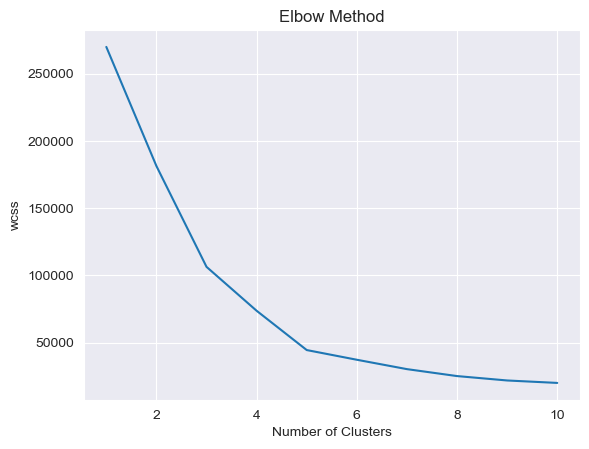

In [43]:
#plotting the elbow method to get the optimal value of K
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

It can be viewed that the last elbow comes at k=5, thus we will have 5 clusters in this case.

In [46]:
# Model build
kmeansmodel = KMeans(n_clusters=5, init = 'k-means++', random_state= None)
y_kmeans = kmeansmodel.fit_predict(x)

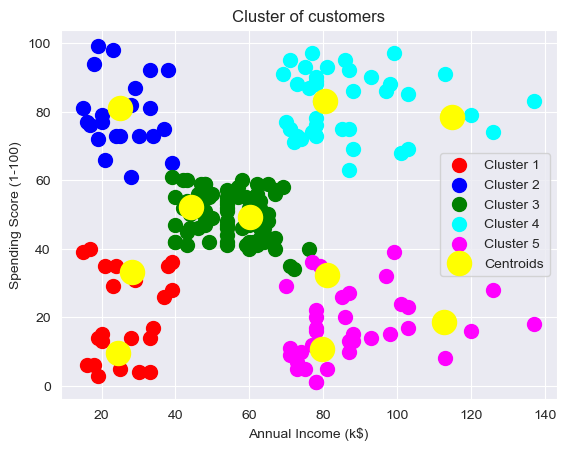

In [47]:
# visualizing the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Cluster of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### interpretation

* Cluster 1 (red) - low annual income, low spending score.
* Cluster 2 (blue) - low annual income, high spending score.
* Cluster 3 (green) - Average interms of earnings and spendings.
* Cluster 4 (cyan) - High annual income, high spending score.
* Cluster 5 (magenta) - High annual income, low spending score.

# Conclusion

Using the K means clustering I have managed to come up with different clusters that are based on different scenarios. Mall management can target the clusters with average spending score to increase their profit and should also maintain good relationship with premium customers with high spending score.They should also work on coming up with new innovative ideas to upgrade the customers with low spending score.